# Пропущенные значения

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# импортируем датасет Титаник
titanic = pd.read_csv('/content/train.csv')

## Выявление пропусков

### Базовые методы

#### Метод `.info()`

In [ ]:
# метод .info() соотносит максимальное количество записей
# с количеством записей в каждом столбце
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# попробуем преобразовать Age в int
# titanic.Age.astype('int')

#### Методы `.isna()` и `.sum()`

In [ ]:
# .isna() выдает True или 1, если есть пропуск,
# .sum() суммирует единицы по столбцам
titanic.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# пропущенные значения в процентах
(titanic.isna().sum() / len(titanic)).round(4) * 100

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


### Библиотека missingno

In [ ]:
# импортируем библиотеку missingno с псевдонимом msno
import missingno as msno

In [ ]:
# сделаем стиль графиков seaborn основным
sns.set()

#### Столбчатая диаграмма пропусков

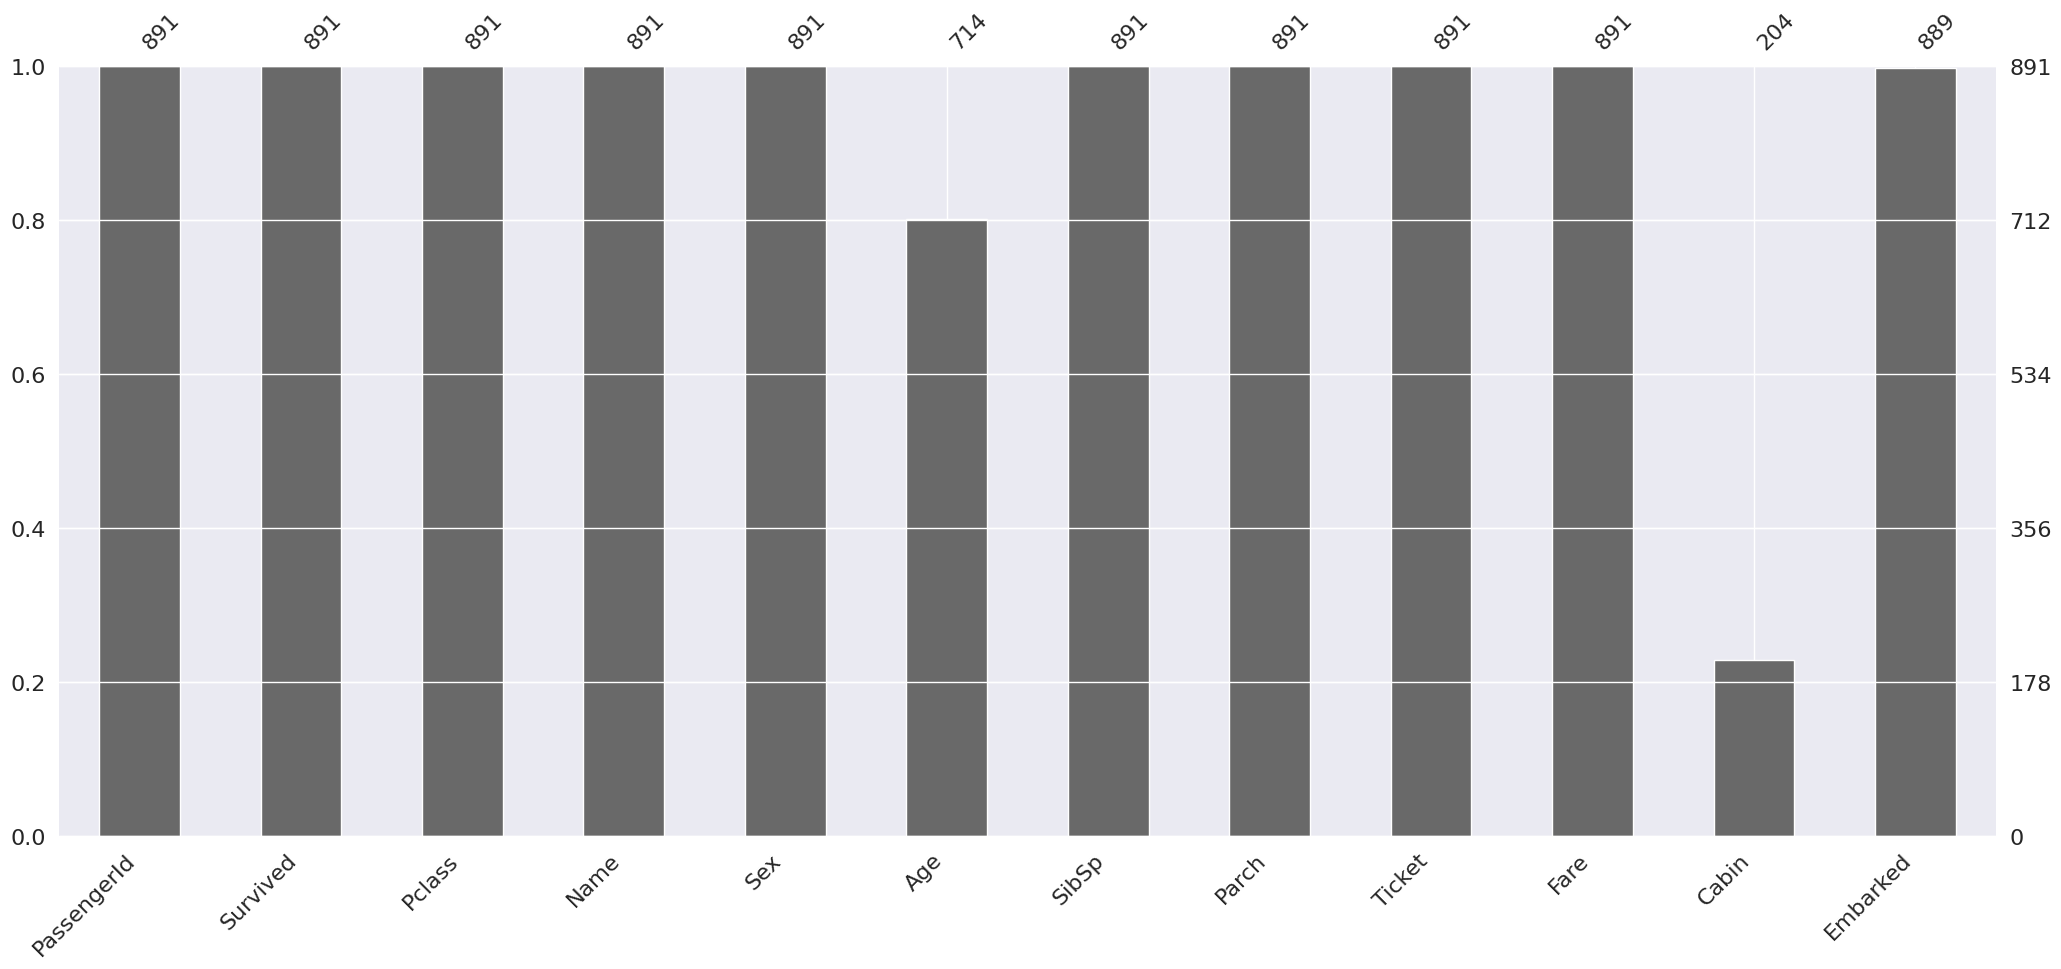

In [ ]:
msno.bar(titanic);

#### Матрица пропущенных значений

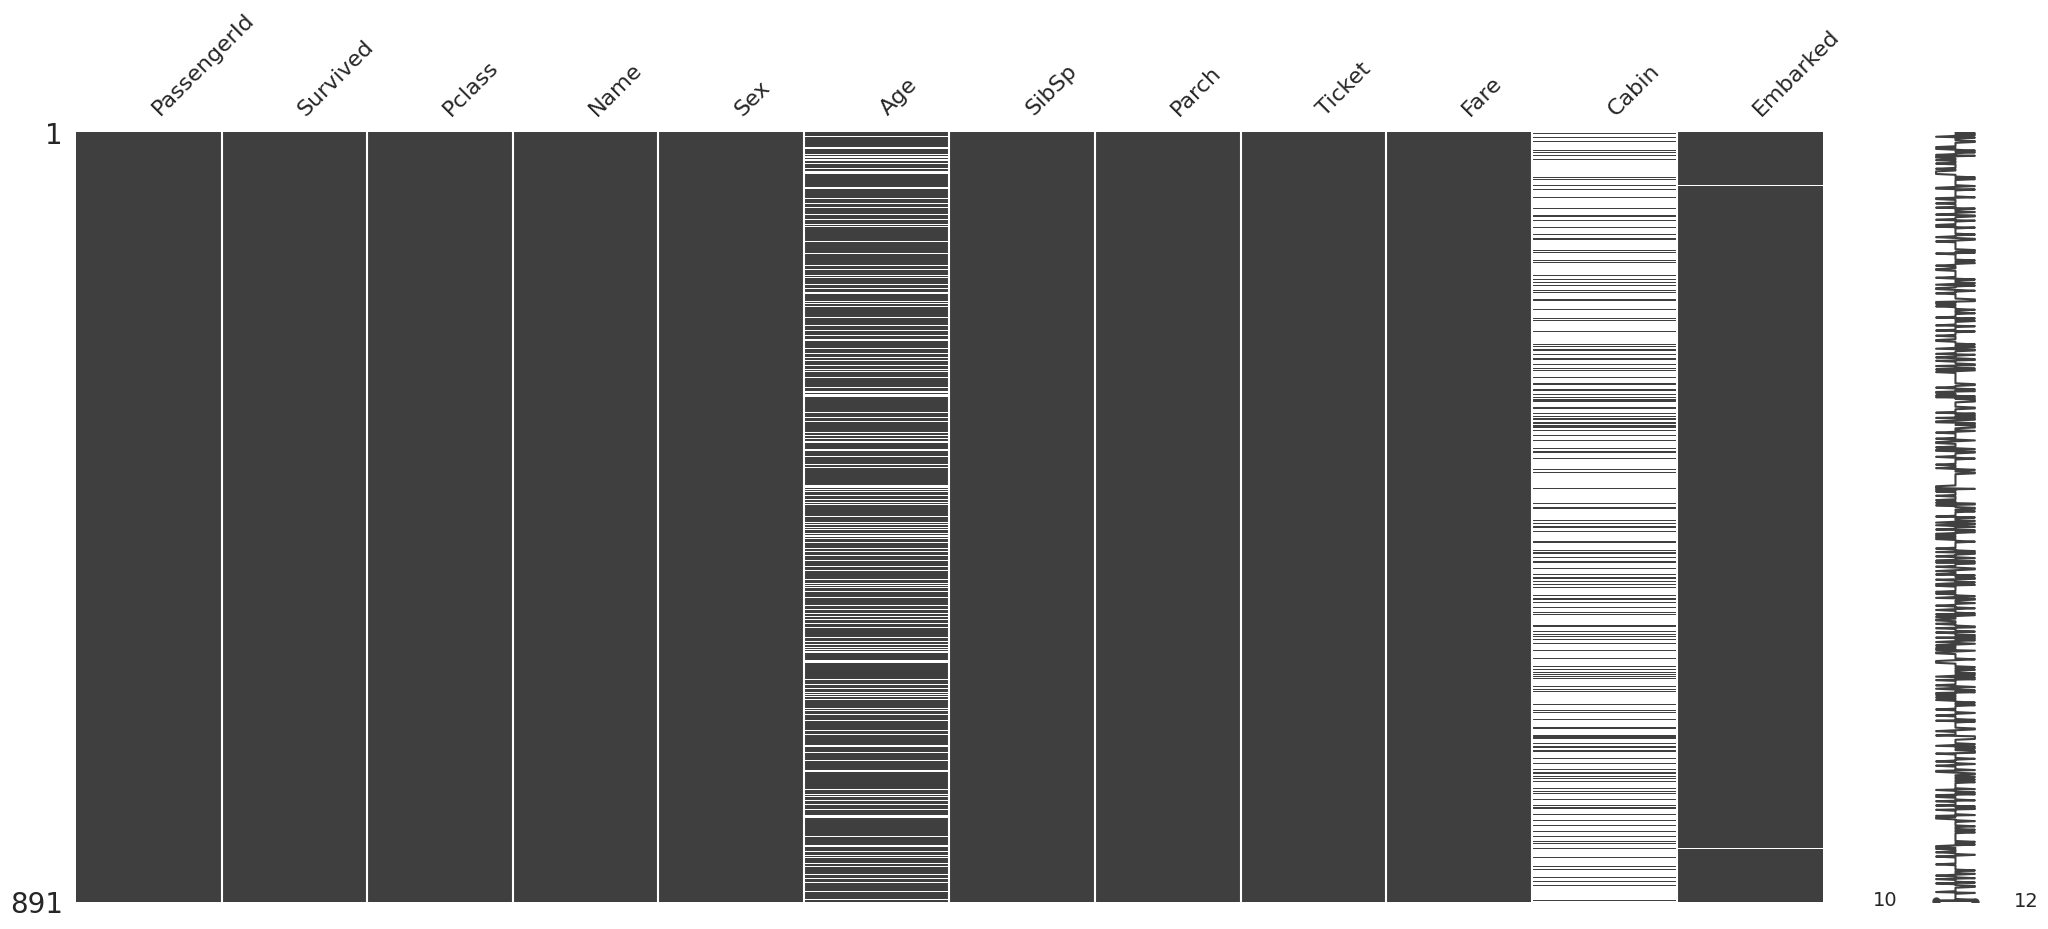

In [ ]:
msno.matrix(titanic);

#### Матрица корреляции пропусков

In [ ]:
# рассчитаем матрицу корреляции, когда известно в каких столбцах были пропуски
titanic[['Age', 'Cabin', 'Embarked']].isnull().corr()

,Age,Cabin,Embarked
Age,1.000000,0.144111,-0.023616
Cabin,0.144111,1.000000,-0.087042
Embarked,-0.023616,-0.087042,1.000000


In [ ]:
# код для случаев, когда столбцы с пропусками неизвестны
df = titanic.iloc[:, [i for i, n in enumerate(np.var(titanic.isnull(), axis = 'rows')) if n > 0]]
df.isnull().corr()

,Age,Cabin,Embarked
Age,1.000000,0.144111,-0.023616
Cabin,0.144111,1.000000,-0.087042
Embarked,-0.023616,-0.087042,1.000000


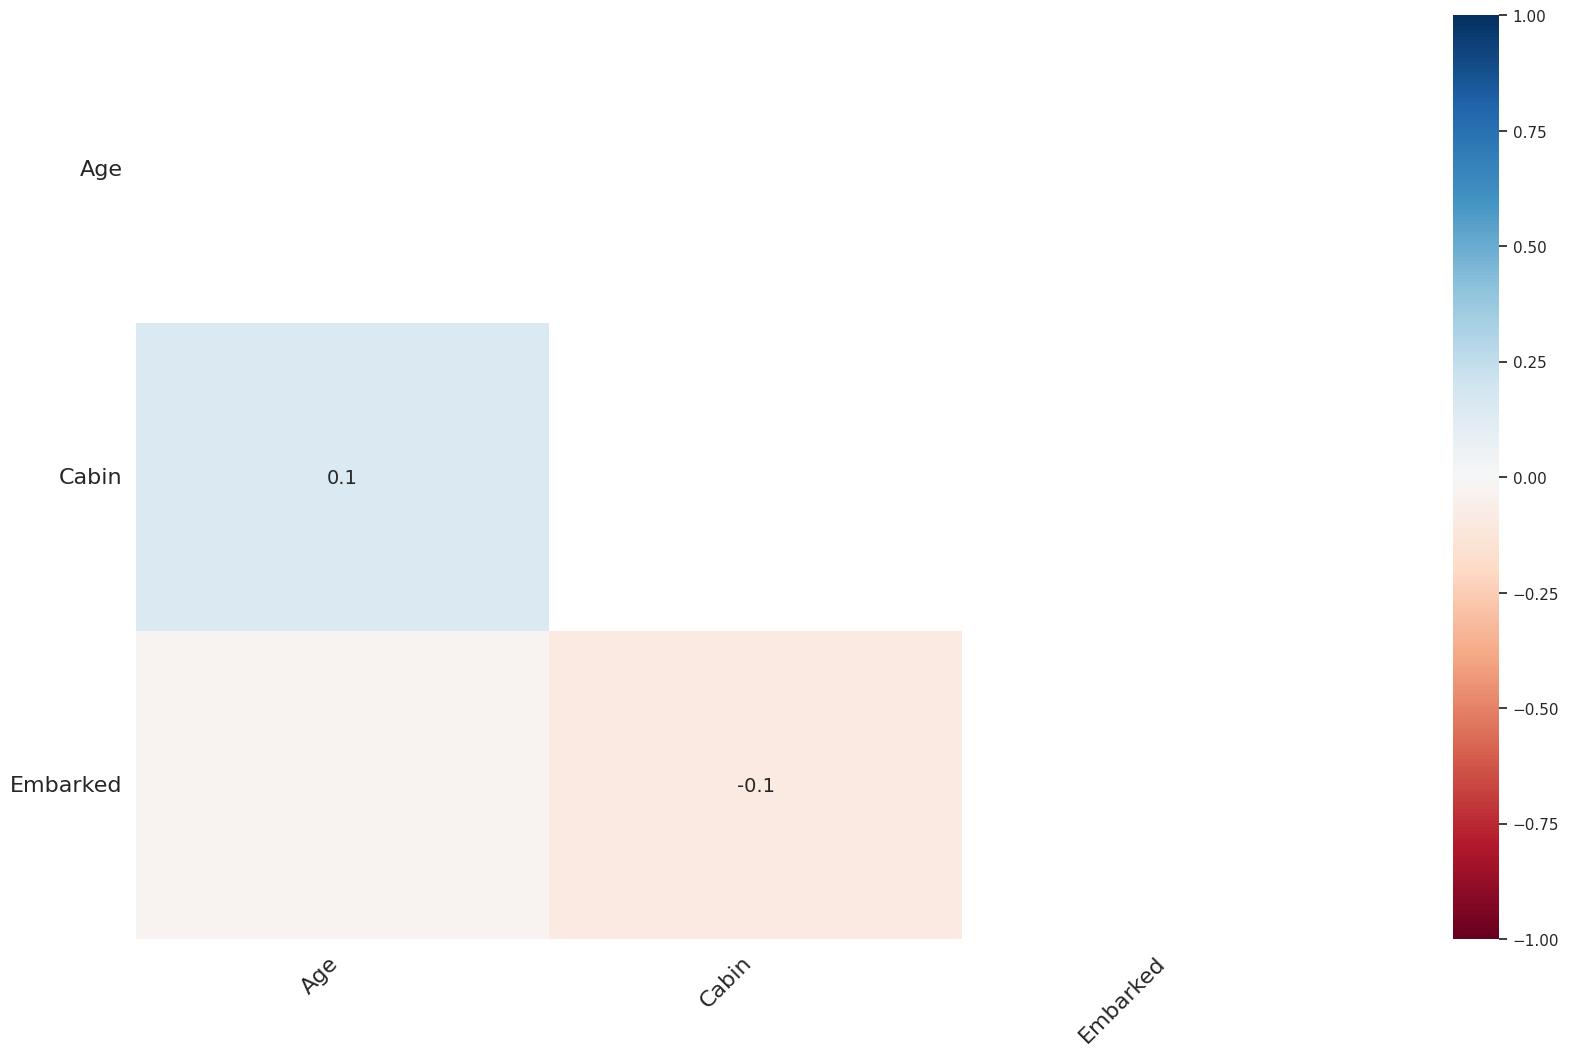

In [ ]:
msno.heatmap(titanic);

## Удаление пропусков

### Удаление строк

In [ ]:
# удаление строк обозначим через axis = 'index'
# subset = ['Embarked'] говорит о том, что мы ищем пропуски только в столбце Embarked
titanic.dropna(axis = 'index', subset = ['Embarked'], inplace = True)

In [ ]:
# убедимся, что в Embarked действительно не осталось пропусков
titanic.Embarked.isna().sum()

0

### Удаление столбцов

In [ ]:
# передадим в параметр columns тот столбец, который хотим удалить
titanic.drop(columns = ['Cabin'], inplace = True)

In [ ]:
# убедимся, что такого столбца больше нет
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Pairwise deletion

In [ ]:
# рассчитаем количество мужчик и женщин по каждому из признаков
sex_g = titanic.groupby('Sex').count()
sex_g

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
Sex,,,,,,,,,,
female,312,312,312,312,259,312,312,312,312,312
male,577,577,577,577,453,577,577,577,577,577


In [ ]:
# сравним количество пассажиров в столбце Age и столбце PassengerId
# мы видим, что метод .count() игнорировал пропуски
sex_g['PassengerId'].sum(), sex_g['Age'].sum()

(889, 712)

In [ ]:
# метод .mean() также игнорирует пропуски и не выдает ошибки
titanic['Age'].mean()

29.64209269662921

In [ ]:
# то же можно сказать про метод .corr()
titanic[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.093143
Fare,0.093143,1.000000


## Заполнение пропусков

Подготовка данных

In [ ]:
# еще раз загрузим датасет "Титаник", в котором снова будут пропущенные значения
titanic = pd.read_csv('/content/train.csv')

# возьмем лишь некоторые из столбцов
titanic = titanic[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked']]

# закодируем столбец Sex с помощью числовых значений
map_dict = {'male' : 0, 'female' : 1}
titanic['Sex'] = titanic['Sex'].map(map_dict)

# посмотрим на результат
titanic.head()

,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,3,0,1,0,7.2500,22.0,S
1,1,1,1,0,71.2833,38.0,C
2,3,1,0,0,7.9250,26.0,S
3,1,1,1,0,53.1000,35.0,S
4,3,0,0,0,8.0500,35.0,S


### Одномерные методы

#### Заполнение константой

Метод `.fillna()`

Количественные данные

In [ ]:
# вначале сделаем копию датасета
fillna_const = titanic.copy()

# заполним пропуски в столбце Age нулями, передав методу .fillna() словарь,
# где ключами будут названия столбцов, а значениями - константы для заполнения пропусков
fillna_const.fillna({'Age' : 0}, inplace = True)

In [ ]:
# посмотрим, как такое заполнение отразилось на данных
titanic.Age.median(), fillna_const.Age.median()

(28.0, 24.0)

Категориальные данные

In [ ]:
# найдем пассажиров с неизвестным портом посадки
# для этого создадим маску по столбцу Embarked и применим ее к исходным данным
missing_embarked = pd.read_csv('/content/train.csv')
missing_embarked[missing_embarked.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
# метод .fillna() можно применить к одному столбцу
# два пропущенных значения в столбце Embarked заполним буквой S (Southampton)
fillna_const.Embarked.fillna('S', inplace = True)

In [ ]:
# убедимся, что в столбцах Age и Embarked не осталось пропущенных значений
fillna_const[['Age', 'Embarked']].isna().sum()

,0
Age,0
Embarked,0


SimpleImputer

In [ ]:
# сделаем копию датасета
const_imputer = titanic.copy()

# импортируем класс SimpleImputer из модуля impute библиотеки sklearn
from sklearn.impute import SimpleImputer

# создадим объект этого класса, указав,
# что мы будем заполнять константой strategy = 'constant', а именно нулем fill_value = 0
imp_const = SimpleImputer(strategy = 'constant', fill_value = 0)

# и обучим модель на столбце Age
# мы используем двойные скобки, потому что метод .fit() на вход принимает двумерный массив
imp_const.fit(const_imputer[['Age']])

SimpleImputer(fill_value=0, strategy='constant')

In [ ]:
# также используем двойные скобки с методом .transform()
const_imputer['Age'] = imp_const.transform(const_imputer[['Age']])

# убедимся, что пропусков не осталось и посчитаем количество нулевых значений
const_imputer.Age.isna().sum(), (const_imputer['Age'] == 0).sum()

(0, 177)

In [ ]:
# для дальнейшей работы столбец Embarked нам не понадобится, удалим его
const_imputer.drop(columns = ['Embarked'], inplace = True)

# посмотрим на размер получившегося датафрейма
const_imputer.shape

(891, 6)

In [ ]:
# посмотрим на результат
const_imputer.head(3)

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3,0,1,0,7.2500,22.0
1,1,1,1,0,71.2833,38.0
2,3,1,0,0,7.9250,26.0


#### Заполнение средним арифметическим или медианой

Метод `.fillna()`

In [ ]:
# сделаем копию датафрейма
fillna_median = titanic.copy()

# заполним пропуски в столбце Age медианным значением возраста,
# можно заполнить и средним арифметическим через метод .mean()
fillna_median.Age.fillna(fillna_median.Age.median(), inplace = True)

# убедимся, что пропусков не осталось
fillna_median.Age.isna().sum()

0

SimpleImputer

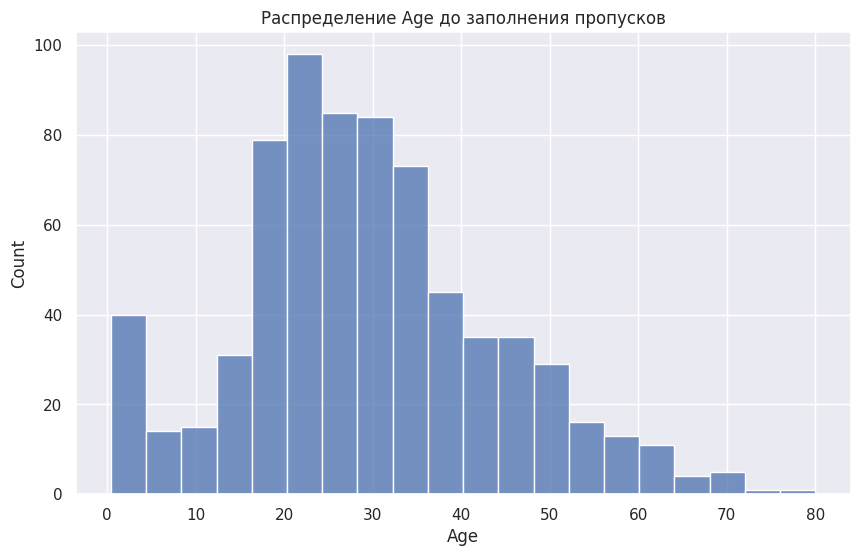

In [ ]:
# изменим размер последующих графиков
sns.set(rc = {'figure.figsize' : (10, 6)})

# скопируем датафрейм
median_imputer = titanic.copy()

# посмотрим на распределение возраста до заполнения пропусков
sns.histplot(median_imputer['Age'], bins = 20)
plt.title('Распределение Age до заполнения пропусков');

In [ ]:
# посмотрим на среднее арифметическое и медиану
median_imputer['Age'].mean().round(1), median_imputer['Age'].median()

(29.7, 28.0)

In [ ]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['Age'] = imp_median.fit_transform(median_imputer[['Age']])

# убедимся, что пропущенных значений не осталось
median_imputer.Age.isna().sum()

0

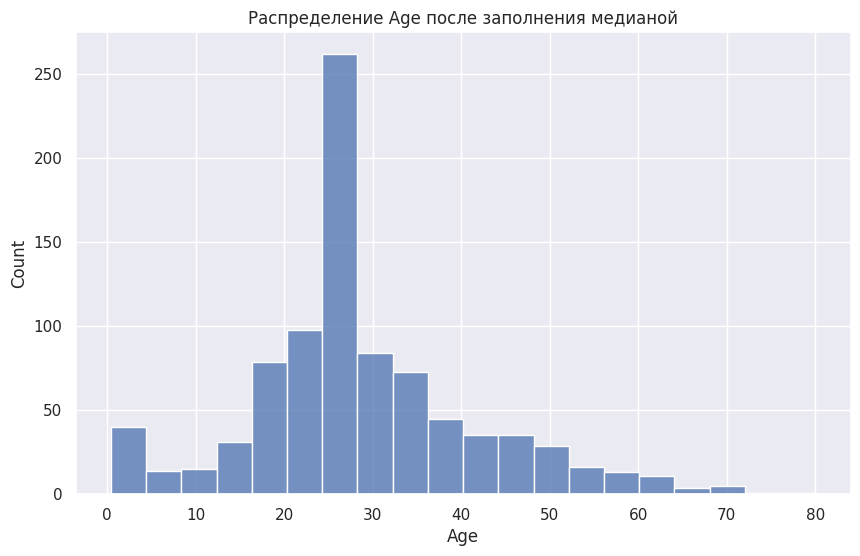

In [ ]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['Age'], bins = 20)
plt.title('Распределение Age после заполнения медианой');

In [ ]:
# посмотрим на метрики после заполнения медианой
median_imputer['Age'].mean().round(1), median_imputer['Age'].median()

(29.4, 28.0)

In [ ]:
# столбец Embarked нам опять же не понадобится
median_imputer.drop(columns = ['Embarked'], inplace = True)

# посмотрим на размеры получившегося датафрейма
median_imputer.shape

(891, 6)

#### Заполнение внутригрупповым значением

In [ ]:
# скопируем датафрейм
median_imputer_bins = titanic.copy()

In [ ]:
# выберем столбец 'Age'
# заполним пропуски в столбце 'Age', выполнив группировку по 'Sex','Pclass' и
# применив функцию 'median' через метод .transform()
median_imputer_bins['Age'].fillna(median_imputer_bins\
                                  .groupby(['Sex','Pclass'])['Age']\
                                  .transform('median'), inplace = True)

In [ ]:
# проверим пропуски в столбце Age
median_imputer_bins.Age.isna().sum()

0

In [ ]:
# столбец Embarked нам опять же не понадобится
median_imputer_bins.drop(columns = ['Embarked'], inplace = True)

# посмотрим на размеры получившегося датафрейма
median_imputer_bins.shape

(891, 6)

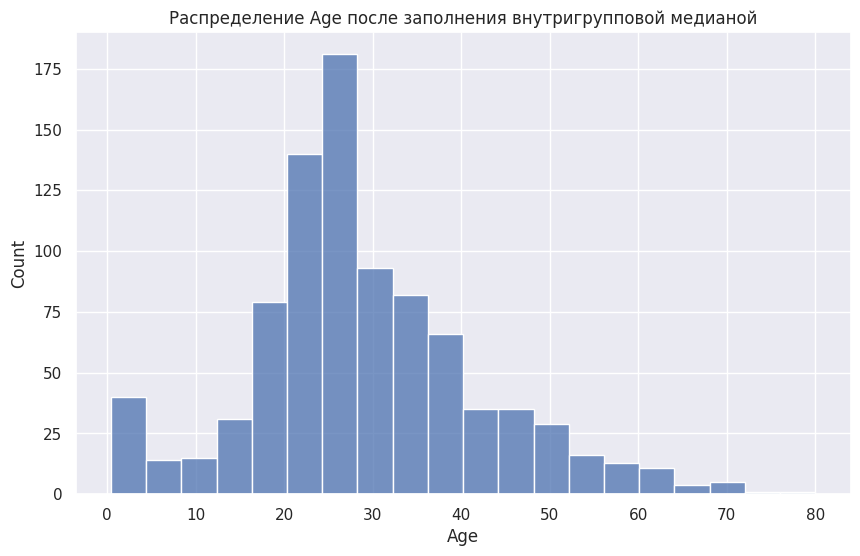

In [ ]:
sns.histplot(median_imputer_bins['Age'], bins = 20)
plt.title('Распределение Age после заполнения внутригрупповой медианой');

#### Заполнение наиболее частотным значением

In [ ]:
# скопируем датафрейм
titanic_mode = titanic.copy()

# посмотрим на распределение пассажиров по порту посадки до заполнения пропусков
titanic_mode.groupby('Embarked')['Sex'].count()

,Sex
Embarked,
C,168
Q,77
S,644


In [ ]:
# создадим объект класса SimpleImputer с параметром strategy = 'most_frequent'
imp_most_freq = SimpleImputer(strategy = 'most_frequent')

In [ ]:
# применим метод .fit_transform() к столбцу Embarked
titanic_mode['Embarked'] = imp_most_freq.fit_transform(titanic_mode[['Embarked']]).ravel()

In [ ]:
# убедимся, что пропусков не осталось
titanic_mode.Embarked.isna().sum()

0

In [ ]:
# проверим результат
# количество пассажиров в категории S должно увеличиться на два
titanic_mode.groupby('Embarked')['Sex'].count()

,Sex
Embarked,
C,168
Q,77
S,646


In [ ]:
# найти моду можно также так
titanic.Embarked.value_counts().index[0]

'S'

In [ ]:
# или так
imp_most_freq.statistics_

array(['S'], dtype=object)

In [ ]:
# для работы с последующими методами столбец Embarked нам уже не нужен
titanic.drop(columns = ['Embarked'], inplace = True)

### Многомерные методы

#### Линейная регрессия

##### Детерминированный подход

Подготовка данных

In [ ]:
# сделаем копию датасета
lr = titanic.copy()

# импортируем класс StandardScaler модуля Preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

# создаем объект этого класса
scaler = StandardScaler()

# применяем метод .fit_transform() и сразу помещаем результат в датафрейм
lr = pd.DataFrame(scaler.fit_transform(lr), columns = lr.columns)

# посмотрим на результат
lr.head(3)

,Pclass,Sex,SibSp,Parch,Fare,Age
0,0.827377,-0.737695,0.432793,-0.473674,-0.502445,-0.530377
1,-1.566107,1.355574,0.432793,-0.473674,0.786845,0.571831
2,0.827377,1.355574,-0.474545,-0.473674,-0.488854,-0.254825


In [ ]:
# поместим в датафрейм test те строки, в которых в столбце Age есть пропуски
test = lr[lr['Age'].isnull()].copy()
test.head(3)

,Pclass,Sex,SibSp,Parch,Fare,Age
5,0.827377,-0.737695,-0.474545,-0.473674,-0.478116,NaN
17,-0.369365,-0.737695,-0.474545,-0.473674,-0.386671,NaN
19,0.827377,1.355574,-0.474545,-0.473674,-0.502949,NaN


In [ ]:
# посмотрим на количество таких строк
test.shape

(177, 6)

In [ ]:
# в train напротив окажутся те строки, где в Age пропусков нет
train = lr.dropna().copy()

# оценим их количество
train.shape

(714, 6)

In [ ]:
# вместе train + test должны давать 891 строку
len(train) + len(test)

891

In [ ]:
# из датафрейма train выделим столбец Age, это будет наша целевая переменная
y_train = train['Age']

# из датафрейма признаков столбец Age нужно удалить
X_train = train.drop('Age', axis = 1)

# в test столбец Age в принципе не нужен
X_test = test.drop('Age', axis = 1)

In [ ]:
# оценим результаты
X_train.head(3)

,Pclass,Sex,SibSp,Parch,Fare
0,0.827377,-0.737695,0.432793,-0.473674,-0.502445
1,-1.566107,1.355574,0.432793,-0.473674,0.786845
2,0.827377,1.355574,-0.474545,-0.473674,-0.488854


In [ ]:
y_train.head(3)

,Age
0,-0.530377
1,0.571831
2,-0.254825


In [ ]:
X_test.head(3)

,Pclass,Sex,SibSp,Parch,Fare
5,0.827377,-0.737695,-0.474545,-0.473674,-0.478116
17,-0.369365,-0.737695,-0.474545,-0.473674,-0.386671
19,0.827377,1.355574,-0.474545,-0.473674,-0.502949


Обучение модели и заполнение пропусков

In [ ]:
# импортируем класс LinearRegression
from sklearn.linear_model import LinearRegression

# создадим объект этого класса
lr_model = LinearRegression()

# обучим модель
lr_model.fit(X_train, y_train)

# применим обученную модель к данным, в которых были пропуски в столбце Age
y_pred = lr_model.predict(X_test)

# посмотрим на первые три прогнозных значения
y_pred[:3]

array([-0.09740093,  0.37999257, -0.31925429])

In [ ]:
# присоединим прогнозные значения возраста к датафрейму test
test['Age'] = y_pred
test.head(3)

,Pclass,Sex,SibSp,Parch,Fare,Age
5,0.827377,-0.737695,-0.474545,-0.473674,-0.478116,-0.097401
17,-0.369365,-0.737695,-0.474545,-0.473674,-0.386671,0.379993
19,0.827377,1.355574,-0.474545,-0.473674,-0.502949,-0.319254


In [ ]:
# в train столбец Age присутствовал изначально
train.head(3)

,Pclass,Sex,SibSp,Parch,Fare,Age
0,0.827377,-0.737695,0.432793,-0.473674,-0.502445,-0.530377
1,-1.566107,1.355574,0.432793,-0.473674,0.786845,0.571831
2,0.827377,1.355574,-0.474545,-0.473674,-0.488854,-0.254825


In [ ]:
# соединим датафреймы методом "один на другой"
lr = pd.concat([train, test])
lr.head(7)

,Pclass,Sex,SibSp,Parch,Fare,Age
0,0.827377,-0.737695,0.432793,-0.473674,-0.502445,-0.530377
1,-1.566107,1.355574,0.432793,-0.473674,0.786845,0.571831
2,0.827377,1.355574,-0.474545,-0.473674,-0.488854,-0.254825
3,-1.566107,1.355574,0.432793,-0.473674,0.420730,0.365167
4,0.827377,-0.737695,-0.474545,-0.473674,-0.486337,0.365167
6,-1.566107,-0.737695,-0.474545,-0.473674,0.395814,1.674039
7,0.827377,-0.737695,2.247470,0.767630,-0.224083,-1.908136


In [ ]:
# восстановим изначальный порядок строк, отсортировав их по индексу
lr.sort_index(inplace = True)
lr.head(7)

,Pclass,Sex,SibSp,Parch,Fare,Age
0,0.827377,-0.737695,0.432793,-0.473674,-0.502445,-0.530377
1,-1.566107,1.355574,0.432793,-0.473674,0.786845,0.571831
2,0.827377,1.355574,-0.474545,-0.473674,-0.488854,-0.254825
3,-1.566107,1.355574,0.432793,-0.473674,0.420730,0.365167
4,0.827377,-0.737695,-0.474545,-0.473674,-0.486337,0.365167
5,0.827377,-0.737695,-0.474545,-0.473674,-0.478116,-0.097401
6,-1.566107,-0.737695,-0.474545,-0.473674,0.395814,1.674039


In [ ]:
# вернем исходный масштаб с помощью метода .inverse_transform()
lr = pd.DataFrame(scaler.inverse_transform(lr), columns = lr.columns)

# округлим столбец Age и выведем результат
lr.Age = lr.Age.round(1)
lr.head(7)

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3.0,0.0,1.0,0.0,7.2500,22.0
1,1.0,1.0,1.0,0.0,71.2833,38.0
2,3.0,1.0,0.0,0.0,7.9250,26.0
3,1.0,1.0,1.0,0.0,53.1000,35.0
4,3.0,0.0,0.0,0.0,8.0500,35.0
5,3.0,0.0,0.0,0.0,8.4583,28.3
6,1.0,0.0,0.0,0.0,51.8625,54.0


In [ ]:
# восстановив значение возраста первого наблюдения вручную
(-0.530377 * titanic.Age.std() + titanic.Age.mean()).round()

22.0

In [ ]:
# убедимся в отсутствии пропусков и посмотрим на размеры получившегося датафрейма
lr.Age.isna().sum(), lr.shape

(0, (891, 6))

Оценка результата

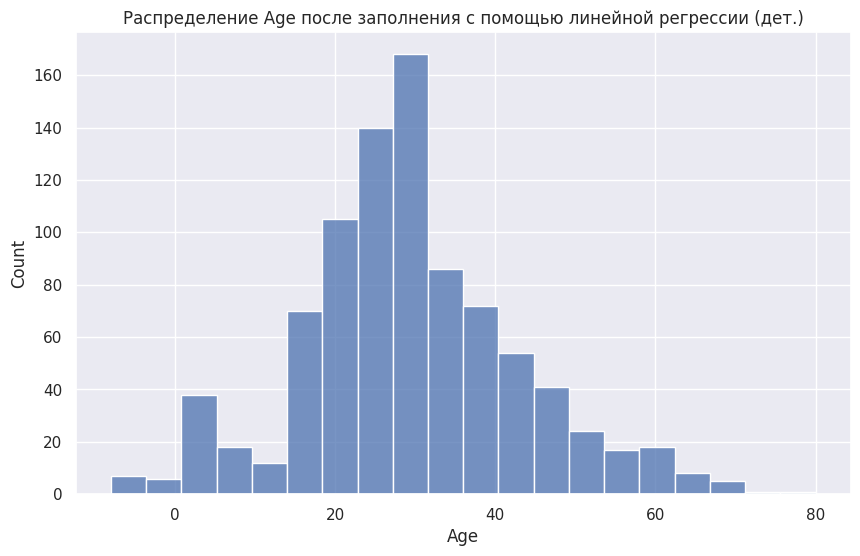

In [ ]:
# посмотрим на распределение возраста после заполнения пропусков
sns.histplot(lr['Age'], bins = 20)
plt.title('Распределение Age после заполнения с помощью линейной регрессии (дет.)');

In [ ]:
# чтобы возраст был только положительным,
# установим минимальное значение на уровне 0,5
lr.Age.clip(lower = 0.5, inplace = True)

In [ ]:
# посмотрим, как изменились среднее арифметическое и медиана
lr.Age.mean().round(1), lr.Age.median()

(29.3, 28.3)

Недостаток детерминированного подхода

In [ ]:
# сделаем копию датафрейма, которую используем для визуализации
lr_viz = lr.copy()

# создадим столбец Age_type, в который запишем значение actual, если индекс наблюдения есть в train,
# и imputed, если нет (т.е. он есть в test)
lr_viz['Age_type'] = np.where(lr.index.isin(train.index), 'actual', 'imputed')

# вновь "обрежем" нулевые значения
lr_viz.Age.clip(lower = 0.5, inplace = True)

# посмотрим на результат
lr_viz.head(7)

,Pclass,Sex,SibSp,Parch,Fare,Age,Age_type
0,3.0,0.0,1.0,0.0,7.2500,22.0,actual
1,1.0,1.0,1.0,0.0,71.2833,38.0,actual
2,3.0,1.0,0.0,0.0,7.9250,26.0,actual
3,1.0,1.0,1.0,0.0,53.1000,35.0,actual
4,3.0,0.0,0.0,0.0,8.0500,35.0,actual
5,3.0,0.0,0.0,0.0,8.4583,28.3,imputed
6,1.0,0.0,0.0,0.0,51.8625,54.0,actual


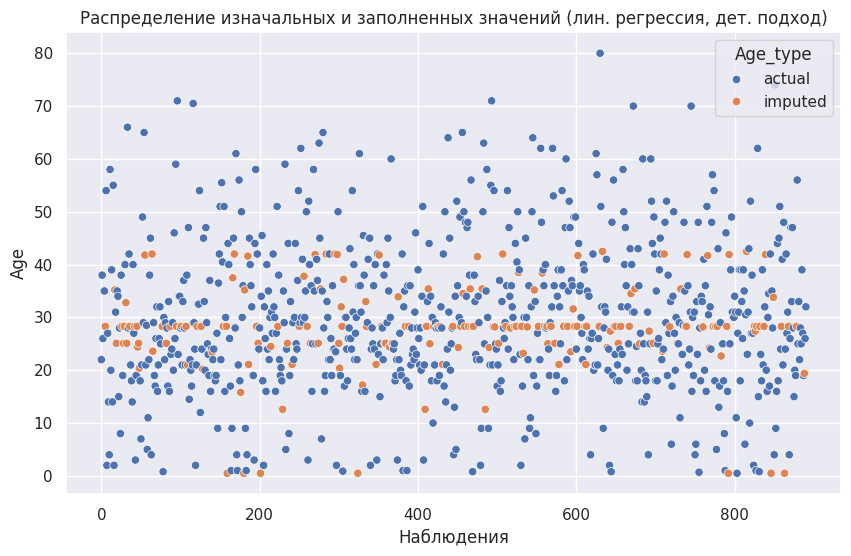

In [ ]:
# создадим график, где по оси x будет индекс датафрейма,
# по оси y - возраст, а цветом мы обозначим изначальное это значение, или заполненное
sns.scatterplot(data = lr_viz, x = lr_viz.index, y = 'Age', hue = 'Age_type')
plt.title('Распределение изначальных и заполненных значений (лин. регрессия, дет. подход)')
plt.xlabel('Наблюдения');

In [ ]:
# рассчитаем СКО для исходных и заполненных значений
lr_viz[lr_viz['Age_type'] == 'actual'].Age.std().round(2), \
lr_viz[lr_viz['Age_type'] == 'imputed'].Age.std().round(2)

(14.53, 8.33)

##### Стохастический подход

In [ ]:
# объявим функцию для создания гауссовского шума
# на входе эта функция будет принимать некоторый массив значений x,
# среднее значение mu, СКО std и точку отсчета для воспроизводимости результата
def gaussian_noise(x, mu = 0, std = 1, random_state = 42):

  # вначале создадим объект, который позволит получать воспроизводимые результаты
  rs = np.random.RandomState(random_state)

  # применим метод .normal() к этому объекту для создания гауссовского шума
  noise = rs.normal(mu, std, size = x.shape)

  # добавим шум к исходному массиву
  return x + noise

In [ ]:
# заменим заполненные значения теми же значениями, но с добавлением шума
test['Age'] = gaussian_noise(x = test['Age'])

# посмотрим, как изменились заполненные значения
test.head(3)

,Pclass,Sex,SibSp,Parch,Fare,Age
5,0.827377,-0.737695,-0.474545,-0.473674,-0.478116,0.399313
17,-0.369365,-0.737695,-0.474545,-0.473674,-0.386671,0.241728
19,0.827377,1.355574,-0.474545,-0.473674,-0.502949,0.328434


In [ ]:
# соединим датасеты и обновим индекс
lr_stochastic = pd.concat([train, test])
lr_stochastic.sort_index(inplace = True)

# вернем исходный масштаб с помощью метода .inverse_transform()
lr_stochastic = pd.DataFrame(scaler.inverse_transform(lr_stochastic), columns = lr_stochastic.columns)

# округлим столбец Age и выведем результат
lr_stochastic.Age = lr_stochastic.Age.round(1)
lr_stochastic.head(7)

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3.0,0.0,1.0,0.0,7.2500,22.0
1,1.0,1.0,1.0,0.0,71.2833,38.0
2,3.0,1.0,0.0,0.0,7.9250,26.0
3,1.0,1.0,1.0,0.0,53.1000,35.0
4,3.0,0.0,0.0,0.0,8.0500,35.0
5,3.0,0.0,0.0,0.0,8.4583,35.5
6,1.0,0.0,0.0,0.0,51.8625,54.0


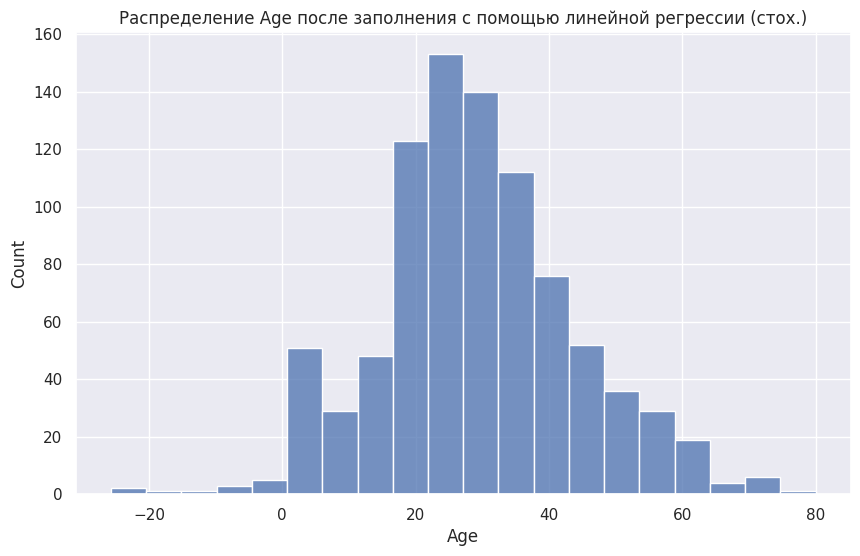

In [ ]:
# посмотрим на распределение возраста
# после заполнения пропусков с помощью стохастического подхода
sns.histplot(lr_stochastic['Age'], bins = 20)
plt.title('Распределение Age после заполнения с помощью линейной регрессии (стох.)');

In [ ]:
# обрежем нулевые и отрицательные значения
lr_stochastic.Age.clip(lower = 0.5, inplace = True)

In [ ]:
# посмотрим на среднее арифметическое и медиану
lr_stochastic.Age.mean().round(1), lr_stochastic.Age.median()

(29.3, 28.0)

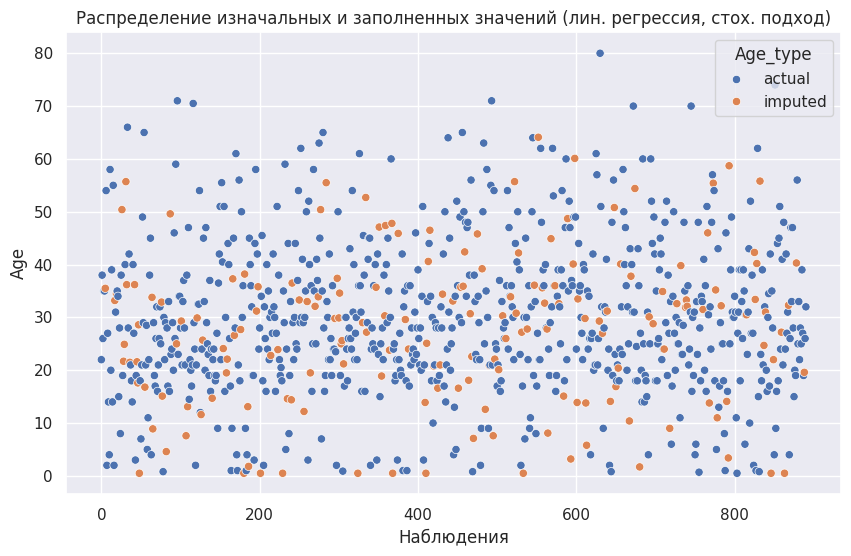

In [ ]:
# сделаем копию датафрейма, которую используем для визуализации
lr_st_viz = lr_stochastic.copy()

# создадим столбец Age_type, в который запишем actual, если индекс наблюдения есть в train,
# и imputed, если нет (т.е. он есть в test)
lr_st_viz['Age_type'] = np.where(lr_stochastic.index.isin(train.index), 'actual', 'imputed')

# вновь "обрежем" нулевые значения
lr_st_viz.Age.clip(lower = 0.5, inplace = True)

# создадим график, где по оси x будет индекс датафрейма,
# по оси y - возраст, а цветом мы обозначим изначальное это значение, или заполненное
sns.scatterplot(data = lr_st_viz, x = lr_st_viz.index, y = 'Age', hue = 'Age_type')
plt.title('Распределение изначальных и заполненных значений (лин. регрессия, стох. подход)')
plt.xlabel('Наблюдения');

In [ ]:
# рассчитаем СКО для исходных и заполненных значений
lr_st_viz[lr_st_viz['Age_type'] == 'actual'].Age.std().round(2), \
lr_st_viz[lr_st_viz['Age_type'] == 'imputed'].Age.std().round(2)

(14.53, 14.34)

#### MICE / IterativeImputer

In [ ]:
# сделаем копию датасета для работы с методом MICE
mice = titanic.copy()

In [ ]:
# предварительно нам нужно "включить" класс IterativeImputer,
from sklearn.experimental import enable_iterative_imputer
# затем импортировать его
from sklearn.impute import IterativeImputer

In [ ]:
# теперь импортируем классы моделей, которые мы можем использовать в MICE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# создадим объект класса StandardScaler
scaler = StandardScaler()

# стандартизируем данные и сразу поместим их в датафрейм
mice = pd.DataFrame(scaler.fit_transform(mice), columns = mice.columns)

In [ ]:
# создадим объект класса IterativeImputer и укажем необходимые параметры
mice_imputer = IterativeImputer(initial_strategy = 'mean', # вначале заполним пропуски средним значением
                                estimator = LinearRegression(), # в качестве модели используем линейную регрессию
                                random_state = 42 # добавим точку отсчета
                                )

# используем метод .fit_transform() для заполнения пропусков в датасете mice
mice = mice_imputer.fit_transform(mice)

# вернем данные к исходному масштабу и округлим столбец Age
mice = pd.DataFrame(scaler.inverse_transform(mice), columns = titanic.columns)
mice.Age = mice.Age.round(1)
mice.head(7)

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3.0,0.0,1.0,0.0,7.2500,22.0
1,1.0,1.0,1.0,0.0,71.2833,38.0
2,3.0,1.0,0.0,0.0,7.9250,26.0
3,1.0,1.0,1.0,0.0,53.1000,35.0
4,3.0,0.0,0.0,0.0,8.0500,35.0
5,3.0,0.0,0.0,0.0,8.4583,28.3
6,1.0,0.0,0.0,0.0,51.8625,54.0


In [ ]:
# убедимся, что пропусков не осталось
mice.Age.isna().sum(), mice.shape

(0, (891, 6))

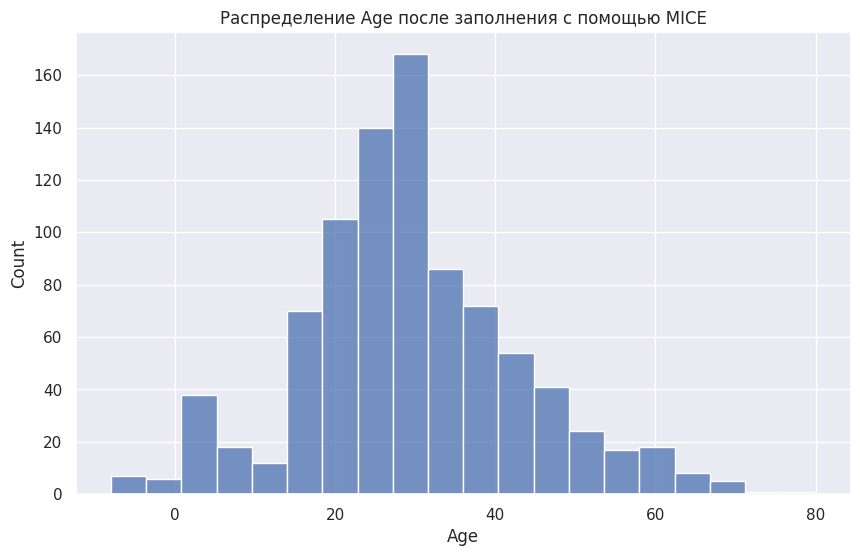

In [ ]:
# посмотрим на гистограмму возраста после заполнения пропусков
sns.histplot(mice['Age'], bins = 20)
plt.title('Распределение Age после заполнения с помощью MICE');

In [ ]:
# обрежем нулевые и отрицательные значения
mice.Age.clip(lower = 0.5, inplace = True)

In [ ]:
# оценим среднее арифметическое и медиану
mice.Age.mean().round(1), mice.Age.median()

(29.3, 28.3)

In [ ]:
# сравним СКО исходного датасета и данных после алгоритма MICE
titanic.Age.std().round(2), mice.Age.std().round(2)

(14.53, 13.54)

#### KNN Imputation

##### Sklearn KNNImputer

In [ ]:
# сделаем копию датафрейма
knn = titanic.copy()

# создадим объект класса StandardScaler
scaler = StandardScaler()

# масштабируем данные и сразу преобразуем их обратно в датафрейм
knn = pd.DataFrame(scaler.fit_transform(knn), columns = knn.columns)

In [ ]:
# импортируем класс KNNImputer
from sklearn.impute import KNNImputer

# создадим объект этого класса с параметрами:
# пять соседей и однаковым весом каждого из них
knn_imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')

# заполним пропуски в столбце Age
knn = pd.DataFrame(knn_imputer.fit_transform(knn), columns = knn.columns)

# проверим отсутствие пропусков и размеры получившегося датафрейма
knn.Age.isna().sum(), knn.shape

(0, (891, 6))

In [ ]:
# вернем исходный масштаб
knn = pd.DataFrame(scaler.inverse_transform(knn), columns = knn.columns)

# округлим значение возраста
knn.Age = knn.Age.round(1)

# посмотрим на результат
knn.head(7)

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3.0,0.0,1.0,0.0,7.2500,22.0
1,1.0,1.0,1.0,0.0,71.2833,38.0
2,3.0,1.0,0.0,0.0,7.9250,26.0
3,1.0,1.0,1.0,0.0,53.1000,35.0
4,3.0,0.0,0.0,0.0,8.0500,35.0
5,3.0,0.0,0.0,0.0,8.4583,24.2
6,1.0,0.0,0.0,0.0,51.8625,54.0


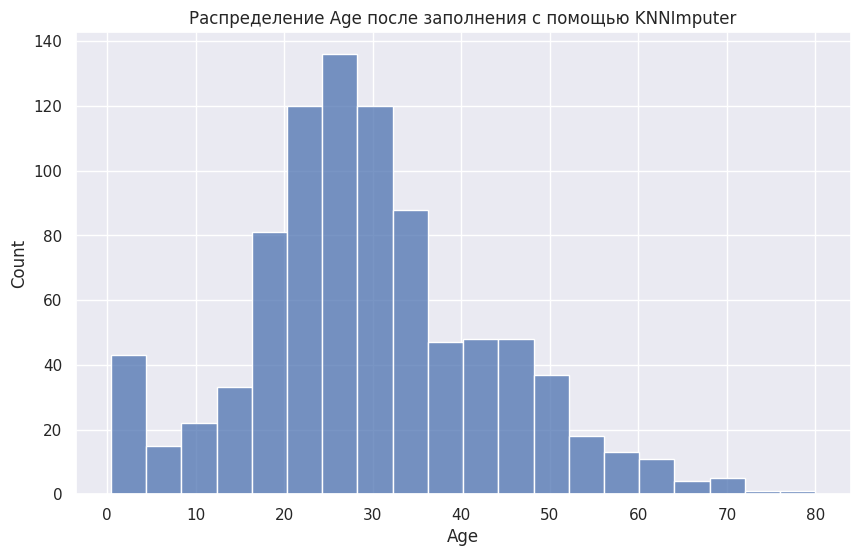

In [ ]:
# посмотрим на распределение возраста после заполнения пропусков
sns.histplot(knn['Age'], bins = 20)
plt.title('Распределение Age после заполнения с помощью KNNImputer');

#### Сравнение методов

In [ ]:
# создадим два списка, в первый поместим датасеты с заполненными значениями
datasets = [const_imputer, median_imputer, median_imputer_bins, lr, lr_stochastic, mice, knn]

# во второй, названия методов
methods = ['constant', 'median', 'binned median', 'linear regression', 'stochastic linear regression', 'MICE','KNNImputer']

In [ ]:
# возьмем целевую переменную из исходного файла
y = pd.read_csv('/content/train.csv')['Survived']

In [ ]:
# делать прогноз мы будем с помощью логистической регрессии
from sklearn.linear_model import LogisticRegression

# оценку качество будем делать по accuracy
from sklearn.metrics import accuracy_score

In [ ]:
# в цикле пройдемся по датасетам с заполненными пропусками
# и списком названий соответствующих методов
for X, method in zip(datasets, methods):

  # масштабируем признаки
  X = StandardScaler().fit_transform(X)

  # для каждого датасета построим и обучим модель логистической регрессии
  model = LogisticRegression()
  model.fit(X, y)

  # сделаем прогноз
  y_pred = model.predict(X)

  # выведем название использованного метода и достигнутую точность
  print(f'Method: {method}, accuracy: {np.round(accuracy_score(y, y_pred), 3)}')

Method: constant, accuracy: 0.79
Method: median, accuracy: 0.795
Method: binned median, accuracy: 0.808
Method: linear regression, accuracy: 0.808
Method: stochastic linear regression, accuracy: 0.796
Method: MICE, accuracy: 0.808
Method: KNNImputer, accuracy: 0.802


## Ответы на вопросы

**Вопрос**. Что делать, если пропуски заполнены каким-либо символом, а не NaN? Например, знаком вопроса.

In [ ]:
df = pd.DataFrame([[1, 2, 3],
                   ['?', 5, 6],
                   [7, '?', 9]])

df

,0,1,2
0,1,2,3
1,?,5,6
2,7,?,9


In [ ]:
df[df == '?'] = np.nan
df

,0,1,2
0,1,2,3
1,NaN,5,6
2,7,NaN,9
